<a href="https://colab.research.google.com/github/RodrigoDSVDF/Projeto1/blob/main/ExplorandoConcurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as srn
import seaborn as sns
import statistics  as sts
import matplotlib.pyplot as plt


In [4]:
aprovacao = pd.read_csv('/content/CLASSIFICAÇÃO ATUALIZADA 6.1.2023.csv')

In [5]:
aprovacao.shape


(2207, 15)

In [6]:

nomes_para_renomear = [
    ('Nomo', 'Nome'),
    ('Classificação', 'Classificacao'),
    ('Língua Portuguesa e Redação Oficial', 'Portugues_Redacao'),
    ('Noções de História e Geografia Geral do DF', 'Historia Geografia DF'),
    ('Noções de Informática', 'Informatica'),
    ('Noções de Raciocínio Lógico', 'Raciocinio_Logico'),
    ('Direito Administrativo', 'Direito Administrativo'),
    ('Direito Constitucional', 'Direito Constitucional'),
    ('Noções de Administração Financeira e Orçamentária', 'Administracao Financeira Orcamentaria'),
    ('Direito Penal e Direito Processual Penal', 'Direito Penal Processual Penal'),
    ('Direito Penitenciário e Criminologia', 'Direito Penitenciario Criminologia'),
    ('Direitos Humanos', 'Direitos Humanos'),
    ('Legislação Aplicada aos servidores do Governo\nDF', 'Legislacao Aplicada Servidores GDF'),
    ('Legislação Especial', 'Legislacao Especial'),
    ('Nota Prova Objetiva', 'Nota Prova Objetiva'),
]

# Criar um dicionário de mapeamento a partir da lista
novo_nome_colunas = dict(nomes_para_renomear)

# Renomear todas as colunas no DataFrame
aprovacao.rename(columns=novo_nome_colunas, inplace=True)




In [16]:
print(aprovacao['Nome'].head())

0               Victor Misse\nGuidi
1      Guilherme\nCalaça De Resende
2      Ithallo Dias\nGomes De Souza
3    Joanir Carneiro\nManeta Junior
4             Rafael Cardoso Macedo
Name: Nome, dtype: object


In [8]:
aprovacao.head()

,Nome,Classificacao,Portugues_Redacao,Historia Geografia DF,Informatica,Raciocinio_Logico,Direito Administrativo,Direito Constitucional,Administracao Financeira Orcamentaria,Direito Penal Processual Penal,Direito Penitenciario Criminologia,Direitos Humanos,Legislacao Aplicada Servidores GDF,Legislacao Especial,Nota Prova Objetiva
0,Victor Misse\nGuidi,1,18.0,2.0,5.0,5.0,10.0,10.0,7.0,20.0,38.0,3.0,1.0,3.0,122.0
1,Guilherme\nCalaça De Resende,2,25.0,-1.0,5.0,6.0,10.0,10.0,8.0,15.0,36.0,3.0,2.0,3.0,122.0
2,Ithallo Dias\nGomes De Souza,3,14.0,3.0,6.0,7.0,10.0,10.0,8.0,16.0,37.0,3.0,4.0,3.0,121.0
3,Joanir Carneiro\nManeta Junior,4,18.0,-1.0,5.0,7.0,7.0,10.0,10.0,14.0,40.0,3.0,4.0,3.0,120.0
4,Rafael Cardoso Macedo,5,18.0,2.0,6.0,7.0,10.0,9.0,6.0,14.0,38.0,3.0,3.0,3.0,119.0


In [9]:
print(aprovacao['Nome'].head())


0               Victor Misse\nGuidi
1      Guilherme\nCalaça De Resende
2      Ithallo Dias\nGomes De Souza
3    Joanir Carneiro\nManeta Junior
4             Rafael Cardoso Macedo
Name: Nome, dtype: object


# Nesta Exploração de Dados eu Iniciei minha exploração verificando a distribuição da Nota Final da prova Objetiva em relação ao Volume de Candidados, para compreender melhor essa distribuição e saber quem possívelmente estará mais próximo de ser nomeado, mas a planilha contém resultados somente para Estudo pois não representa os dados Atualizados

In [10]:
aprovacao['Nota Prova Objetiva'].describe()

count    2207.000000
mean       88.947893
std         9.838474
min        75.000000
25%        81.000000
50%        88.000000
75%        95.000000
max       122.000000
Name: Nota Prova Objetiva, dtype: float64

In [11]:
print(aprovacao[['Nome', 'Nota Prova Objetiva']].head())

                             Nome  Nota Prova Objetiva
0             Victor Misse\nGuidi                122.0
1    Guilherme\nCalaça De Resende                122.0
2    Ithallo Dias\nGomes De Souza                121.0
3  Joanir Carneiro\nManeta Junior                120.0
4           Rafael Cardoso Macedo                119.0


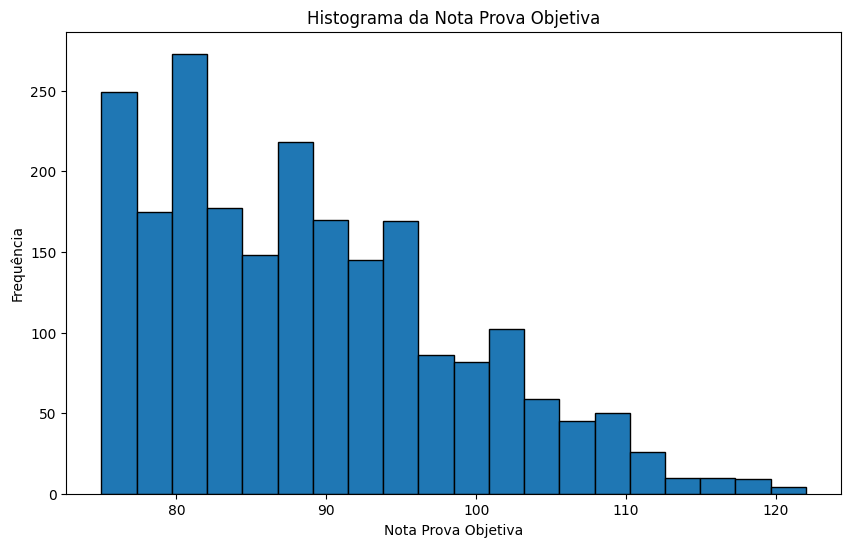

In [12]:
notas = aprovacao['Nota Prova Objetiva']

# Crie um histograma
plt.figure(figsize=(10, 6))
plt.hist(notas, bins=20, edgecolor='black')  # Ajuste o número de bins conforme necessário

# Adicione rótulos e título
plt.xlabel('Nota Prova Objetiva')
plt.ylabel('Frequência')
plt.title('Histograma da Nota Prova Objetiva')

# Exiba o histograma
plt.show()

[Text(0.5, 1.0, 'Boxplot Nota Prova Objetiva')]

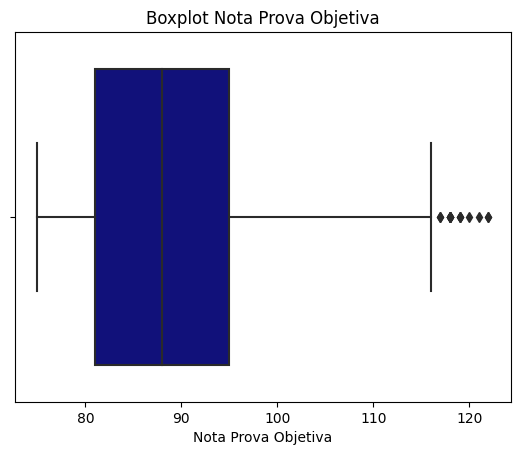

In [17]:
sns.boxplot(x=aprovacao['Nota Prova Objetiva'], color='darkblue').set(title='Boxplot Nota Prova Objetiva')


In [18]:
for indice, linha in aprovacao.iterrows():
    # Verifica se o valor na coluna 'História' é maior que 4
    if linha['Nota Prova Objetiva'] > 110:
        # Imprime o nome e a nota em História
        print(f"{linha['Nome']} tem nota maior que 120 na Prova: {linha['Nota Prova Objetiva']}")

Victor Misse
Guidi tem nota maior que 120 na Prova: 122.0
Guilherme
Calaça De Resende tem nota maior que 120 na Prova: 122.0
Ithallo Dias
Gomes De Souza tem nota maior que 120 na Prova: 121.0
Joanir Carneiro
Maneta Junior tem nota maior que 120 na Prova: 120.0
Rafael Cardoso Macedo tem nota maior que 120 na Prova: 119.0
Mirian Sousa De Freitas tem nota maior que 120 na Prova: 119.0
João Vitor Silva Cury tem nota maior que 120 na Prova: 119.0
Adriano Cordeiro Da
Silva tem nota maior que 120 na Prova: 118.0
Maycon Douglas Alcântara
Vasconcelos tem nota maior que 120 na Prova: 118.0
Mônica Passos De Oliveira tem nota maior que 120 na Prova: 118.0
Marcos Antonio Soares Júnior tem nota maior que 120 na Prova: 118.0
Davi De Mayrinck
Ribeiro tem nota maior que 120 na Prova: 118.0
Joao Batista Frutuoso Neto tem nota maior que 120 na Prova: 118.0
Gislene Ferreira Batista tem nota maior que 120 na Prova: 117.0
Paulo Henrique
Da Silva Dos Santos tem nota maior que 120 na Prova: 117.0
Guilherme Fr

In [19]:
import pandas as pd
import plotly.express as px


# Selecione a coluna 'Nota Prova Objetiva'
notas = aprovacao['Nota Prova Objetiva']

# Crie um histograma com Plotly
fig = px.histogram(notas, nbins=12)

# Adicione um título ao gráfico
fig.update_layout(title_text='Distribuição das Notas da Prova Objetiva')

# Mostre o gráfico
fig.show()


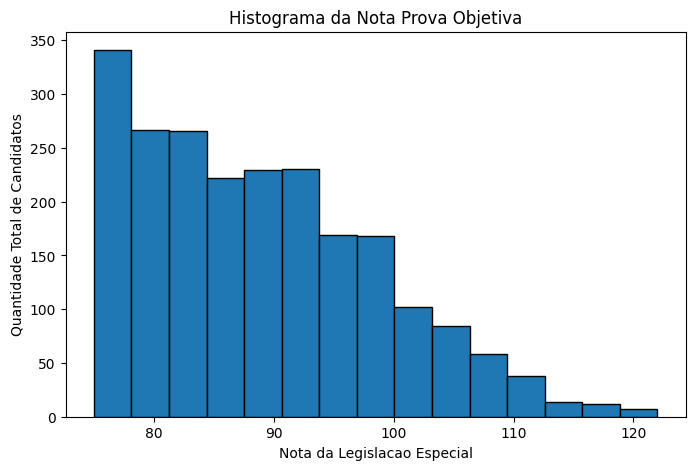

In [20]:
notaspormateria= aprovacao['Legislacao Especial']
plt.figure(figsize=(8, 5))
plt.hist(notas, bins=15, edgecolor='black')  # Ajuste o número de bins conforme necessário
plt.xlabel('Nota da Legislacao Especial')
plt.ylabel('Quantidade Total de Candidatos')
plt.title('Histograma da Nota Prova Objetiva')
plt.show()

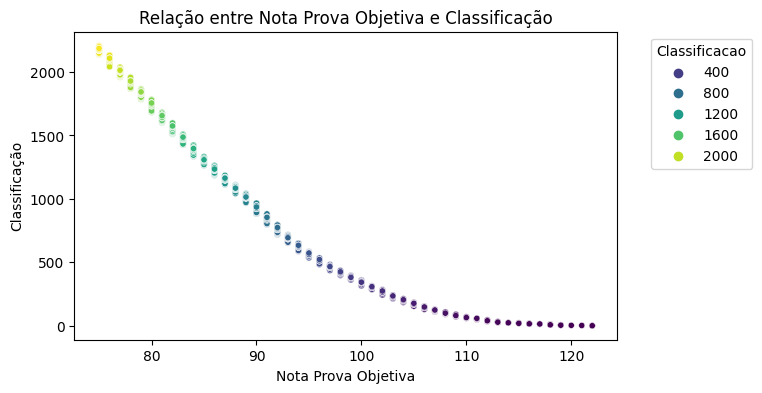

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ordenar o DataFrame pela coluna "Nota Prova Objetiva" em ordem crescente
aprovacao = aprovacao.sort_values(by='Nota Prova Objetiva', ascending=True)

# Criar um gráfico de dispersão
plt.figure(figsize=(7, 4))
scatter = sns.scatterplot(x='Nota Prova Objetiva', y='Classificacao', data=aprovacao, hue='Classificacao', palette='viridis', s=20)

# Adicionar rótulos e legendas
plt.xlabel('Nota Prova Objetiva')
plt.ylabel('Classificação')
plt.title('Relação entre Nota Prova Objetiva e Classificação')
scatter.legend(title='Classificacao', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [22]:

aprovacao = aprovacao.sort_values(by='Nota Prova Objetiva', ascending=False)

# Selecionar as notas dos 400 primeiros candidatos
notas_dos_400_primeiros = aprovacao.head(400)['Nota Prova Objetiva']

# Exibir as notas
print(notas_dos_400_primeiros)


0      122.0
1      122.0
2      121.0
3      120.0
4      119.0
       ...  
395     99.0
396     99.0
402     98.0
415     98.0
404     98.0
Name: Nota Prova Objetiva, Length: 400, dtype: float64


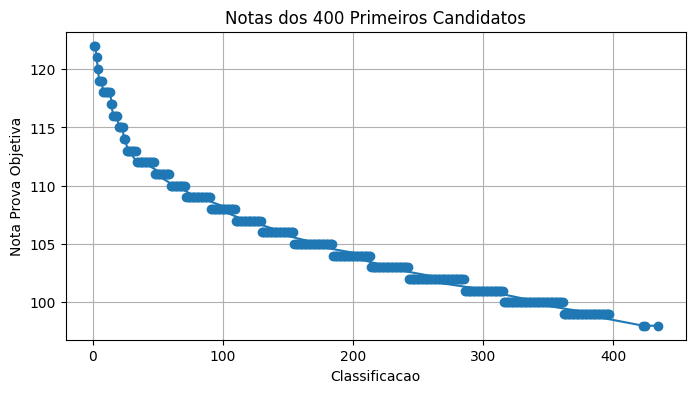

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
aprovacao = aprovacao.sort_values(by='Nota Prova Objetiva', ascending=False)
notas_dos_400_primeiros = aprovacao.head(400)
plt.figure(figsize=(8, 4))
plt.plot(notas_dos_400_primeiros['Classificacao'], notas_dos_400_primeiros['Nota Prova Objetiva'], marker='o')
plt.title('Notas dos 400 Primeiros Candidatos')
plt.xlabel('Classificacao')
plt.ylabel('Nota Prova Objetiva')
plt.grid(True)
plt.show()


# Nesse gráfico pode se observar a quantidade de Candidatos aprovados até a posição 400 e a visualização das respectivas notas finais no eixo Y

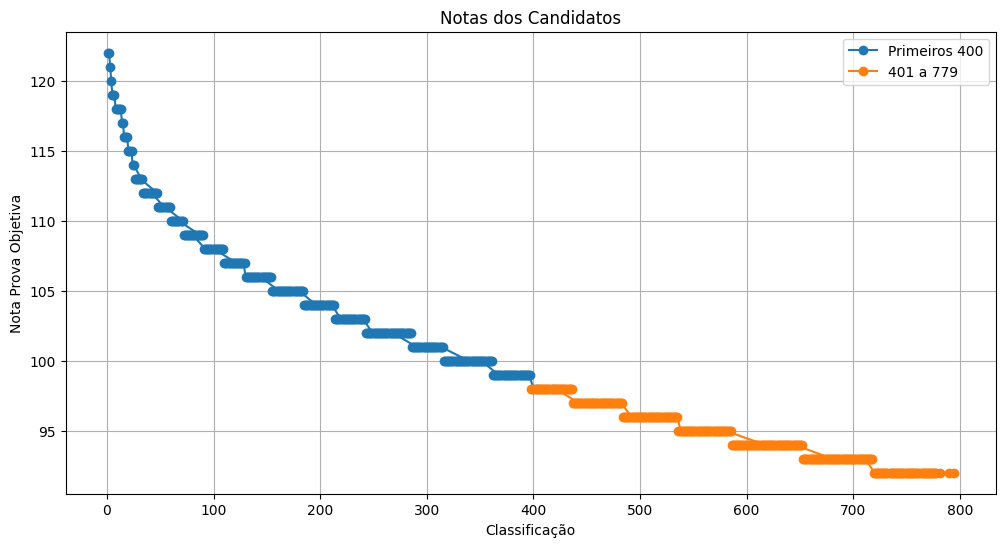

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

aprovacao = aprovacao.sort_values(by='Nota Prova Objetiva', ascending=False)

# Selecionar as notas dos 400 primeiros candidatos
notas_dos_400_primeiros = aprovacao.head(400)

# Selecionar as notas dos candidatos da posição 401 até a 779
notas_dos_401_779 = aprovacao.iloc[400:779]

# Criar um gráfico de barras ou de linha para ambos os grupos
plt.figure(figsize=(12, 6))

plt.plot(notas_dos_400_primeiros['Classificacao'], notas_dos_400_primeiros['Nota Prova Objetiva'], marker='o', label='Primeiros 400')
plt.plot(notas_dos_401_779['Classificacao'], notas_dos_401_779['Nota Prova Objetiva'], marker='o', label='401 a 779')

plt.title('Notas dos Candidatos')
plt.xlabel('Classificação')
plt.ylabel('Nota Prova Objetiva')
plt.legend()
plt.grid(True)
plt.show()


# Neste gráfico de densidade pode-se observar a distribuição da Nota Final da Prova, dos candidados que ficaram entre a posição 400 até 779 em que o eixo X representa as notas, e o eixo Y representa o volume de candidados em relação a nota.

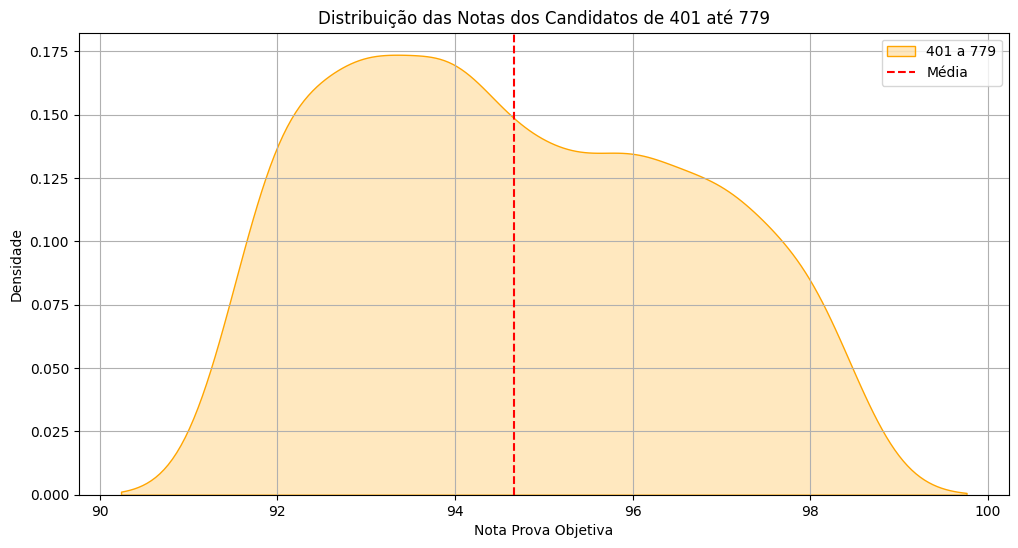

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


notas_401_779 = aprovacao.iloc[400:779]

# Criar um gráfico de densidade
plt.figure(figsize=(12, 6))
sns.kdeplot(notas_401_779['Nota Prova Objetiva'], fill=True, color='orange', label='401 a 779')

# Adicionar detalhes
plt.title('Distribuição das Notas dos Candidatos de 401 até 779')
plt.xlabel('Nota Prova Objetiva')
plt.ylabel('Densidade')
plt.axvline(x=notas_401_779['Nota Prova Objetiva'].mean(), color='red', linestyle='--', label='Média')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

plotar_grafico = lambda df: df.sort_values(by='Nota Prova Objetiva', ascending=False).plot(kind='bar', y=['Classificação', 'Nota Prova Objetiva'], color=['blue', 'green'], alpha=0.5, title='Gráfico de Barras', rot=90, legend=True)
plt.show()

In [ ]:
frequencia_coluna_x = aprovacao['Legislacao Especial'].value_counts()

# Encontre os valores que mais caem na coluna 'Coluna_X'
valores_mais_frequentes = frequencia_coluna_x.idxmax()

# Exiba os valores mais frequentes
print(f"Valores mais frequentes na coluna 'Legislacao Especial': {valores_mais_frequentes}")

Valores mais frequentes na coluna 'Legislacao Especial': 3.0


# NESSE TRECHO IMPRIMIR OS VALORES ESTÁTISTICOS PARA ENTENDER COMO ESTÁ A DISTRIBUIÇÃO DOS DADOS EM RELAÇÃO A NOTA QUE CADA CANDIDATO TIROU NA MATÉRIA DE PORTUGUÊS E REDAÇÃO OFICIAL , E POSTERIORMENTE PLOTEI UM HISTOGRAMA PARA TER UMA VIZUALIZAÇÃO DA DISTRIBUIÇÃO DE FORMA GRÁFICA



In [ ]:
aprovacao['Portugues_Redacao'].describe()

count    2207.000000
mean       15.971908
std         3.024549
min         4.000000
25%        14.000000
50%        16.000000
75%        18.000000
max        25.000000
Name: Portugues_Redacao, dtype: float64

C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_12848\666351114.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Portugues_Redacao')

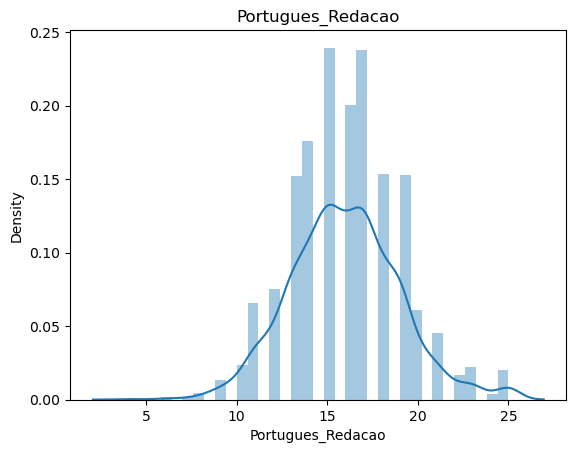

In [ ]:
sns.distplot(aprovacao['Portugues_Redacao']).set_title('Portugues_Redacao')

<Axes: xlabel='Portugues_Redacao', ylabel='Count'>

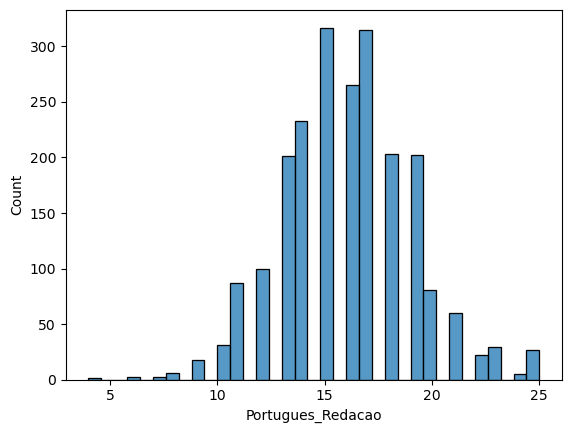

In [ ]:
sns.histplot(aprovacao["Portugues_Redacao"])

# AQUI EU CONTINUEI COM A ESPLORAÇÃO DE DADOS VIZUALIZANDO ESSA DISTRIBUIÇÃO USANDO GRÁFICOS DE DENSIDADE UM BOX PLOT. PODEMOS IDENTICAR VIZUALMENTE QUE A MOIOR PARTE DAS NOTAS FICARAM ENTRE OS VALORES DE 15 E 20 PONTOS


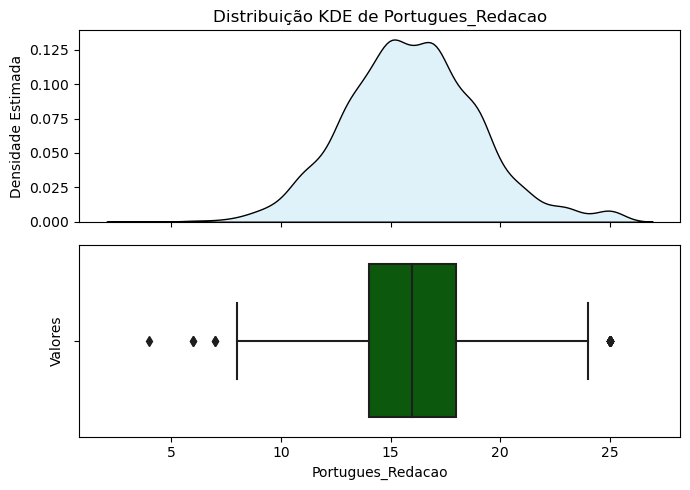

In [ ]:
coluna = 'Portugues_Redacao'
# Crie uma figura com dois eixos lado a lado
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# KDE plot no primeiro eixo
sns.kdeplot(aprovacao[coluna], fill=True, color='skyblue', edgecolor='black', ax=ax1)
ax1.set_ylabel('Densidade Estimada')
ax1.set_title(f'Distribuição KDE de {coluna}')

# Boxplot no segundo eixo
sns.boxplot(x=aprovacao[coluna], color='darkgreen', ax=ax2)
ax2.set_xlabel(coluna)
ax2.set_ylabel('Valores')

# Ajuste de layout
plt.tight_layout()

# Exiba a figura
plt.show()

In [ ]:
for indice, linha in aprovacao.iterrows():
    # Verifica se o valor na coluna 'História' é maior que 4
    if linha['Portugues_Redacao'] > 23:
        # Imprime o nome e a nota em História
        print(f"{linha['Nome']} tem nota maior que 23 na Prova: {linha['Portugues_Redacao']}")

Guilherme
Calaça De Resende tem nota maior que 23 na Prova: 25.0
Bruno Marcel
Ferreira Ramos tem nota maior que 23 na Prova: 24.0
Joao Victor De Souza Sandres tem nota maior que 23 na Prova: 25.0
Claudio Luã Santos De
Oliveira tem nota maior que 23 na Prova: 25.0
Bruno Rafael
De Azevedo Souza tem nota maior que 23 na Prova: 25.0
Rogério José
Vitalino tem nota maior que 23 na Prova: 25.0
Julio Cabral tem nota maior que 23 na Prova: 25.0
Willams Dayvison Pergentino Dos
Santos tem nota maior que 23 na Prova: 25.0
Samuel Gonçalves Da
Silva tem nota maior que 23 na Prova: 25.0
Leila Maria De
Sampaio Aragão tem nota maior que 23 na Prova: 24.0
Gilseppe Bernardo Da
Silva Barros tem nota maior que 23 na Prova: 25.0
Bruno Jacinto
Saldanha tem nota maior que 23 na Prova: 25.0
Alex Felipe Da
Silva Nascimento tem nota maior que 23 na Prova: 25.0
Ricardo Paulino
Da Silva tem nota maior que 23 na Prova: 24.0
Igor Nogueira
De Andrade tem nota maior que 23 na Prova: 24.0
Diego Do Nascimento Silva tem 

In [ ]:
notas_altas_hist = aprovados.loc[aprovados['Nota Prova Objetiva'] > 100]

# Itera sobre as linhas do DataFrame filtrado
for indice, linha in notas_altas_hist.iterrows():
    # Verifica se a nota em Matemática também é alta (ajuste conforme necessário)
    if linha['Historia Geografia DF'] > 6:  # Ajuste o valor conforme a sua condição desejada
        print(f"{linha['Nome']} teve nota alta em História ({linha['História']}) e nota alta em Matemática ({linha['Matemática']})")

# Nesse Trecho fiz uma exploração com base nos valores tirados para matéria de "História e Geografica do DF" e como observado a média é 0 para esta matéria, isso pode ser visto nos quadros de distribuição logo Abaixo

In [ ]:
aprovacao['Historia Geografia DF'].describe()

count    2207.000000
mean        0.291346
std         1.810324
min        -5.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: Historia Geografia DF, dtype: float64

C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_12848\3812751170.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Historia Geografia DF')

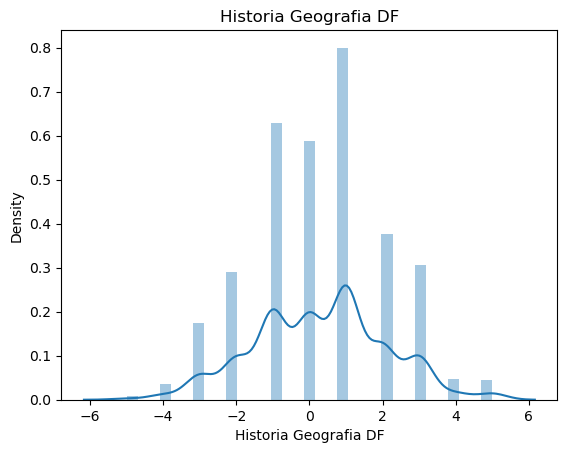

In [ ]:
sns.distplot(aprovacao['Historia Geografia DF']).set_title('Historia Geografia DF')

[Text(0.5, 1.0, 'Boxplot de Historia Geografia DF')]

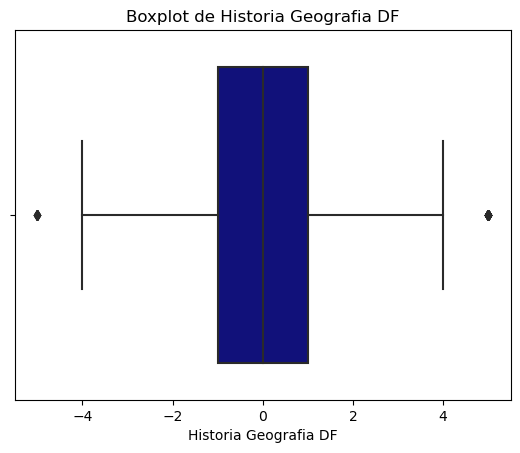

In [ ]:
sns.boxplot(x=aprovacao['Historia Geografia DF'], color='darkblue').set(title='Boxplot de Historia Geografia DF')


In [ ]:
for indice, linha in aprovacao.iterrows():
    # Verifica se o valor na coluna 'História' é maior que 4
    if linha['Historia Geografia DF'] > 4:
        # Imprime o nome e a nota em História
        print(f"{linha['Nome']} tem nota maior que 4 em Ride: {linha['Historia Geografia DF']}")

Luis Henrique Silva Botelho tem nota maior que 4 em Ride: 5.0
Juliana Meneses Crisóstomo De
Sousa tem nota maior que 4 em Ride: 5.0
Vinicius Sousa Marigo tem nota maior que 4 em Ride: 5.0
Jaderson Willame
Queiroz Dos Santos tem nota maior que 4 em Ride: 5.0
Álefe Paulo Xavier Da Silva tem nota maior que 4 em Ride: 5.0
Daniel Jose Da Fonseca Souza tem nota maior que 4 em Ride: 5.0
Alana Ferreira
De Oliveira tem nota maior que 4 em Ride: 5.0
Renato De Sousa Dias tem nota maior que 4 em Ride: 5.0
Heric Jhon Pereira Da
Silva tem nota maior que 4 em Ride: 5.0
Leandro Silva De Oliveira tem nota maior que 4 em Ride: 5.0
Lincoln Soares Rodrigues tem nota maior que 4 em Ride: 5.0
Rodrigo Pereira Santos tem nota maior que 4 em Ride: 5.0
Humberto Eustáquio Machado Dias tem nota maior que 4 em Ride: 5.0
Matheus Batista Pereira
Cartaxo tem nota maior que 4 em Ride: 5.0
Ronaldo Lima Da Silva tem nota maior que 4 em Ride: 5.0
Felipe Augusto Dos Santos Lima tem nota maior que 4 em Ride: 5.0
Kaydher Fe

In [ ]:
notas_altas_hist = aprovacao.loc[aprovacao['Nota Prova Objetiva'] > 100]

# Itera sobre as linhas do DataFrame filtrado
for indice, linha in notas_altas_hist.iterrows():
    # Verifica se a nota em Matemática também é alta (ajuste conforme necessário)
    if linha['Historia Geografia DF'] > 4:  # Ajuste o valor conforme a sua condição desejada
        print(f"{linha['Nome']} teve nota alta em Historia ({linha['Historia Geografia DF']}) e nota alta em Nota Prova Objetiva ({linha['Nota Prova Objetiva']})")

Luis Henrique Silva Botelho teve nota alta em Historia (5.0) e nota alta em Nota Prova Objetiva (115.0)
Juliana Meneses Crisóstomo De
Sousa teve nota alta em Historia (5.0) e nota alta em Nota Prova Objetiva (108.0)
Vinicius Sousa Marigo teve nota alta em Historia (5.0) e nota alta em Nota Prova Objetiva (107.0)
Jaderson Willame
Queiroz Dos Santos teve nota alta em Historia (5.0) e nota alta em Nota Prova Objetiva (106.0)
Álefe Paulo Xavier Da Silva teve nota alta em Historia (5.0) e nota alta em Nota Prova Objetiva (101.0)


In [ ]:
notas_altas_hist = aprovacao.loc[aprovacao['Nota Prova Objetiva'] > 100]

# Itera sobre as linhas do DataFrame filtrado
for indice, linha in notas_altas_hist.iterrows():
    # Verifica se a nota em Matemática também é alta (ajuste conforme necessário)
    if linha['Portugues_Redacao'] > 20:  # Ajuste o valor conforme a sua condição desejada
        print(f"{linha['Nome']} teve nota alta em Portugues({linha['Portugues_Redacao']}) e nota alta em Nota Prova Objetiva ({linha['Nota Prova Objetiva']})")

Guilherme
Calaça De Resende teve nota alta em Portugues(25.0) e nota alta em Nota Prova Objetiva (122.0)
Joao Batista Frutuoso Neto teve nota alta em Portugues(21.0) e nota alta em Nota Prova Objetiva (118.0)
Luzia Alves
Conrado teve nota alta em Portugues(23.0) e nota alta em Nota Prova Objetiva (116.0)
Pedro Ulisses Pimenta teve nota alta em Portugues(22.0) e nota alta em Nota Prova Objetiva (116.0)
André Campos
Marques Da Costa teve nota alta em Portugues(21.0) e nota alta em Nota Prova Objetiva (115.0)
Lásser Pôrto Moreira teve nota alta em Portugues(21.0) e nota alta em Nota Prova Objetiva (115.0)
Daniel
Chendes Lima teve nota alta em Portugues(21.0) e nota alta em Nota Prova Objetiva (113.0)
Bruno Marcel
Ferreira Ramos teve nota alta em Portugues(24.0) e nota alta em Nota Prova Objetiva (113.0)
Daniela Afonso De Oliveira
Silveira teve nota alta em Portugues(22.0) e nota alta em Nota Prova Objetiva (113.0)
Joao Victor De Souza Sandres teve nota alta em Portugues(25.0) e nota alta 

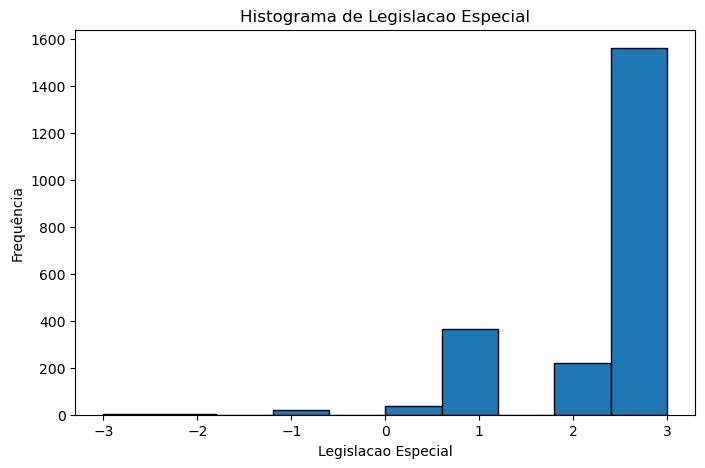

In [ ]:
coluna = 'Legislacao Especial'

# Crie um histograma com bins automáticos
plt.figure(figsize=(8, 5))
plt.hist(aprovacao[coluna], edgecolor='black')

# Adicione rótulos e título
plt.xlabel(coluna)
plt.ylabel('Frequência')
plt.title(f'Histograma de {coluna}')

# Exiba o histograma
plt.show()

# Distribuição das notas pela matéria de informática e seus respectivos gráficos respresentando de forma vizual a distribuição

In [ ]:
aprovacao['Informatica'].describe()

count    2207.000000
mean        4.032170
std         2.100243
min        -4.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: Informatica, dtype: float64

In [26]:
import pandas as pd
import plotly.express as px

# Suponha que você tenha um DataFrame chamado 'aprovacao'
# Substitua 'aprovacao' pelo nome real do seu DataFrame

# Selecione a coluna 'Informatica'
notas_informatica = aprovacao['Informatica']

# Crie um histograma com Plotly em cinza escuro
fig = px.histogram(notas_informatica, nbins=12, color_discrete_sequence=['darkgray'])

# Adicione um título ao gráfico
fig.update_layout(title_text='Distribuição das Notas de Informática')

# Mostre o gráfico
fig.show()


[Text(0.5, 1.0, 'Boxplot de Historia Geografia DF')]

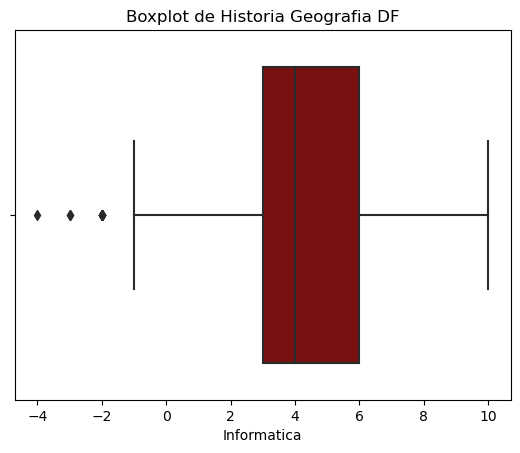

In [ ]:
sns.boxplot(x=aprovacao['Informatica'], color='darkred').set(title='Boxplot de Historia Geografia DF')

In [ ]:
aprovacao['Raciocinio_Logico'].describe()

count    2207.000000
mean        4.420933
std         2.352633
min        -4.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: Raciocinio_Logico, dtype: float64

<Axes: xlabel='Raciocinio_Logico', ylabel='Count'>

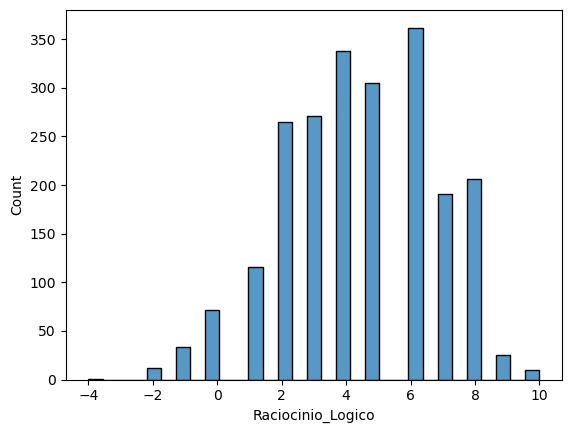

In [ ]:
sns.histplot(aprovacao["Raciocinio_Logico"])

[Text(0.5, 1.0, 'Boxplot de Raciocinio_Logico')]

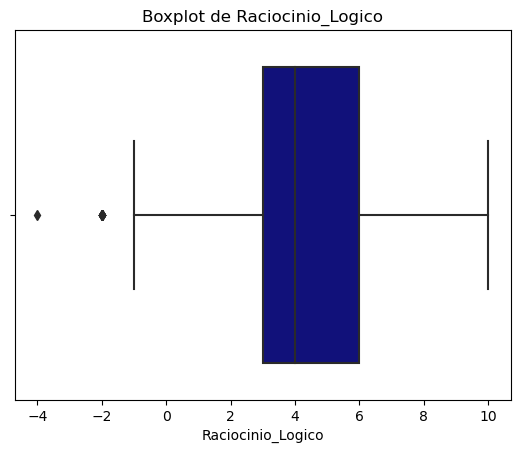

In [ ]:
sns.boxplot(x=aprovacao['Raciocinio_Logico'], color='darkblue').set(title='Boxplot de Raciocinio_Logico')

In [ ]:
aprovacao['Direito Administrativo'].describe()

count    2207.000000
mean        6.841414
std         2.005262
min        -3.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Direito Administrativo, dtype: float64

<Axes: xlabel='Direito Administrativo', ylabel='Count'>

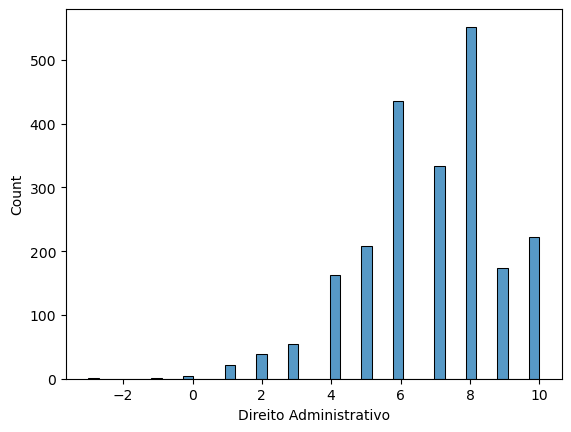

In [ ]:
sns.histplot(aprovacao['Direito Administrativo'])

[Text(0.5, 1.0, 'Direito Administrativo')]

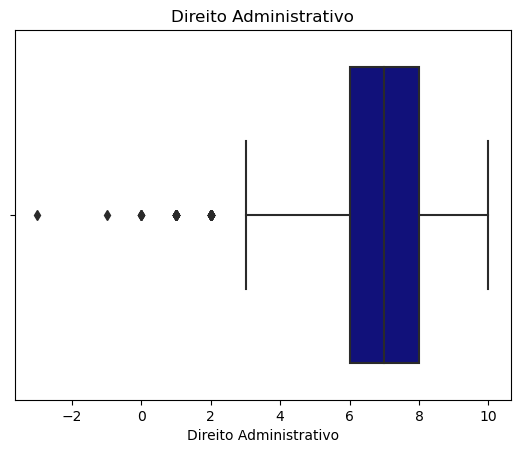

In [ ]:
sns.boxplot(x=aprovacao['Direito Administrativo'], color='darkblue').set(title='Direito Administrativo')

In [ ]:
aprovacao['Direito Constitucional'].describe()

count    2207.000000
mean        6.640236
std         2.172976
min        -3.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Direito Constitucional, dtype: float64

<Axes: xlabel='Direito Constitucional', ylabel='Count'>

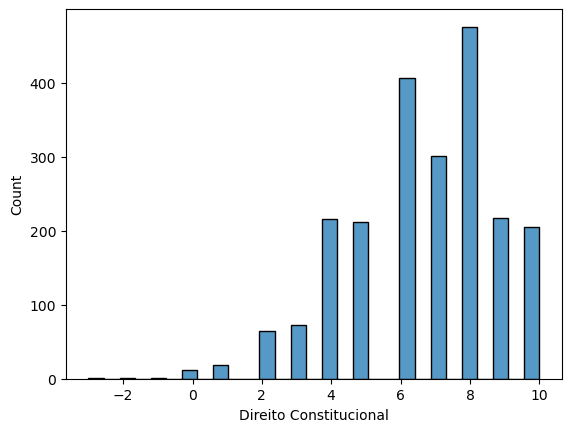

In [ ]:
sns.histplot(aprovacao['Direito Constitucional'])

In [ ]:
aprovacao['Administracao Financeira Orcamentaria'].describe()

count    2207.000000
mean        3.091074
std         2.618427
min        -5.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: Administracao Financeira Orcamentaria, dtype: float64

<Axes: xlabel='Administracao Financeira Orcamentaria', ylabel='Count'>

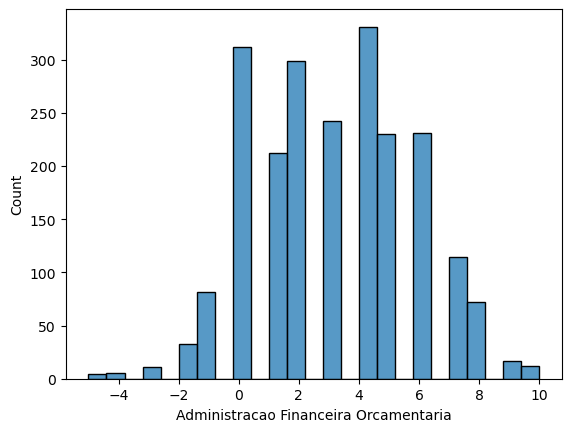

In [ ]:
sns.histplot(aprovacao['Administracao Financeira Orcamentaria'])

In [ ]:
aprovacao["Direito Penal Processual Penal"].describe()

count    2207.000000
mean       11.323969
std         3.275044
min         1.000000
25%         9.000000
50%        12.000000
75%        14.000000
max        20.000000
Name: Direito Penal Processual Penal, dtype: float64

<Axes: xlabel='Direito Penal Processual Penal', ylabel='Count'>

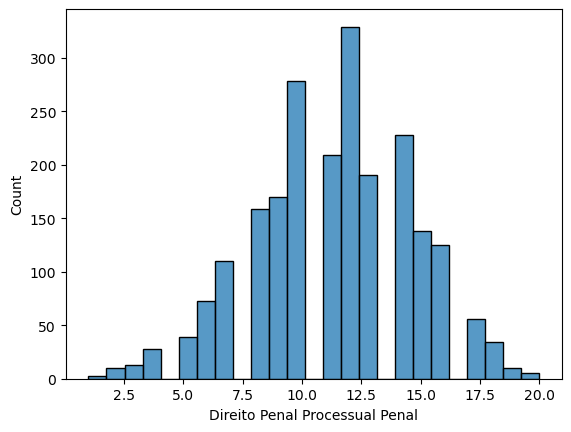

In [ ]:
sns.histplot(aprovacao['Direito Penal Processual Penal'])

In [ ]:
aprovacao["Direito Penitenciario Criminologia"].describe()

count    2207.000000
mean       29.769823
std         5.408141
min         3.000000
25%        27.000000
50%        30.000000
75%        34.000000
max        40.000000
Name: Direito Penitenciario Criminologia, dtype: float64

<Axes: xlabel='Direito Penitenciario Criminologia', ylabel='Count'>

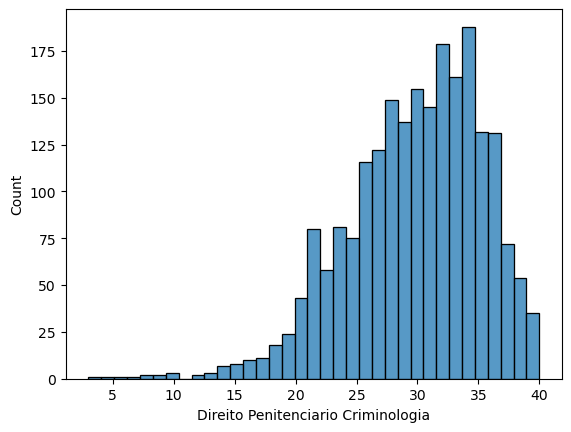

In [ ]:
sns.histplot(aprovacao['Direito Penitenciario Criminologia'])

In [ ]:
aprovacao['Direitos Humanos'].describe()

count    2207.000000
mean        2.588129
std         0.843247
min        -1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Direitos Humanos, dtype: float64

<Axes: xlabel='Direitos Humanos', ylabel='Count'>

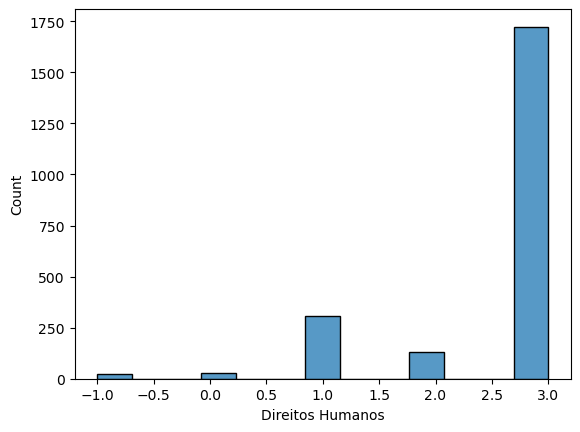

In [ ]:
sns.histplot(aprovacao['Direitos Humanos'])

In [ ]:
aprovacao['Legislacao Aplicada Servidores GDF'].describe()

count    2207.000000
mean        1.497508
std         1.570024
min        -4.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Legislacao Aplicada Servidores GDF, dtype: float64

<Axes: xlabel='Legislacao Aplicada Servidores GDF', ylabel='Count'>

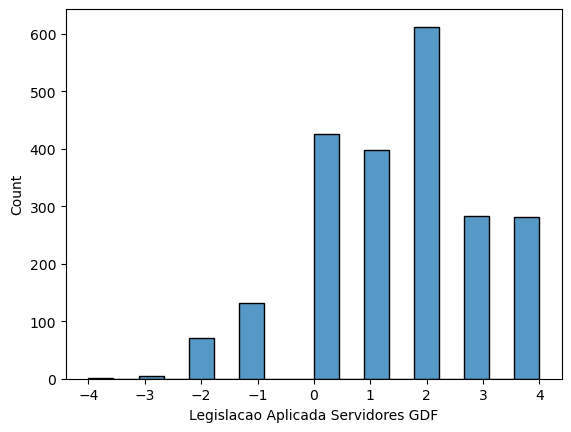

In [ ]:
sns.histplot(aprovacao['Legislacao Aplicada Servidores GDF'])

Conclusão
Ao análisar a distribuição das notas por matéria no bloco de conteúdo Básico, foi identificado que a máteria que mais teve resultados negativos foi a de História e Geografia do Distrito Federal, em que foi observado muitos valores negativos para esta matéria, podemos inferir que foi a matéria que os candidatos mais tiveram dificuldade no bloco de matéria básica da prova